![](http://thecads.org/wp-content/uploads/2017/02/adax_logo.jpg)
# Module 9: Clustering
**Clustering** is the task of partitioning the dataset into groups called clusters. The goal is to split up the data in such a way that points within a single cluster are very similar and points in different clusters are different. Similarly to classification algorithms, clustering algorithms assign (or predict) a number to each data point, indicating which cluster a particular point belongs to. The only difference here is that: The cluster "number" is not indicative of anything meaningful, or labels such as iris flower species, or breast cancer diagnosis or celebrity faces. The numbers only indicate groupings. 

![](https://www.analyticsvidhya.com/wp-content/uploads/2016/11/clustering.png)

How is this useful? Well, clustering can discover the patterns that exist in your data in an exploratory setting. In terms of evaluation, there exists a few quantitative methods (which we will look later), but they mostly made assumptions that are not applicable in some applications. As such, the "goodnesss" of clustering is often hard to assess.

## K-means Clustering

*k-means clustering* is one of the simplest and most commonly used clustering algorithms.
It tries to find cluster centers that are representative of certain regions of the
data. The algorithm alternates between two steps: assigning each data point to the
closest cluster center, and then setting each cluster center as the mean of the data
points that are assigned to it. The algorithm iterates until the assignment of
instances to clusters no longer changes the cluster means by much. The following figure shows a simple step-by-step example of clustering.

![](resources/kmeans-steps.png)

Cluster centers are shown as triangles, while data points are shown as circles. Colors
indicate cluster membership. We specified that we are looking for three clusters, so
the algorithm was initialized by declaring three data points *randomly* as cluster centers
(see "Initialization"). Then the iterative algorithm starts. First, each data point is
assigned to the cluster center it is closest to (see "Assign Points (1)"). Next, the cluster
centers are updated to be the mean of the assigned points (see "Recompute Centers
(1)"). Then the process is repeated two more times. After the third iteration, the
assignment of points to cluster centers remained unchanged, so the algorithm stops.

After clustering is performed, given new data points, k-means will assign each point to the closest cluster center. This process is sometimes known as "quantization" or "vector quantization" (we shall cover this later).

Applying k-means with `scikit-learn` is quite simple. We shall start off with some synthetic data before venturing into more realistic data. Similar to the classification estimators, the `KMeans` class is instantiated, and the number of clusters we are looking for are set. Then we call the `fit` method to perform the fitting to the data.

In [1]:
#TODO: Import all general libraries
%matplotlib inline

In [2]:
#TODO: import make_blobs, make_moons, KMeans from sklearn and plotlib from plottinglib
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plottinglib as plotlib

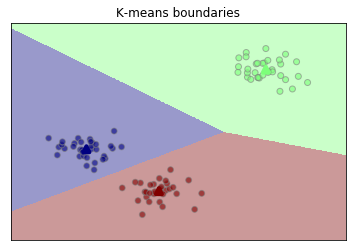

In [3]:
# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
#Todo: initialize the kmeans with 3 clusters and fit to dataset
kmeans = KMeans(n_clusters=3, n_init=20)
kmeans = kmeans.fit(X)


# plot data
colormap='jet'
plotlib.plot_estimator_boundaries(kmeans, X, y, cm=colormap, alpha=0.4, title='K-means boundaries')
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, marker='o', cmap=colormap, alpha=0.6, edgecolors='grey')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c=[0, 1, 2], marker='^', 
            linewidths=4, cmap=colormap)
plt.show()

Text(0,0.5,'Featured2')

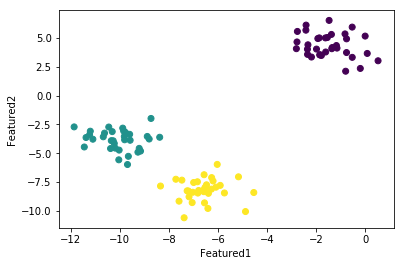

In [4]:
#Initial cluster
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('Featured1')
plt.ylabel('Featured2')

In [5]:
kmeans.__dict__

{'algorithm': 'auto', 'cluster_centers_': array([[-10.04935243,  -3.85954095],
        [ -1.4710815 ,   4.33721882],
        [ -6.58196786,  -8.17239339]]), 'copy_x': True, 'inertia_': 156.28289251170003, 'init': 'k-means++', 'labels_': array([1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
        2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
        0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
        1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1,
        0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1]), 'max_iter': 300, 'n_clusters': 3, 'n_init': 20, 'n_iter_': 1, 'n_jobs': 1, 'precompute_distances': 'auto', 'random_state': None, 'tol': 0.0001, 'verbose': 0}

During the algorithm, each training data point in `X` is assigned a cluster label. You can
find these labels in the `kmeans.labels_` attribute:

In [6]:
print("Cluster memberships:\n{}".format(kmeans.labels_))
kmeans.labels_

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


array([1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1])

As we asked for three clusters, the clusters are numbered 0 to 2. You can also assign cluster labels to new points, using the predict method. Each new point is assigned to the closest cluster center when predicting, but the existing model
is not changed. Running predict on the training set returns the same result as
`labels_`:

In [7]:
#todo: check by running predict, if the labels are the same as before
labels_ = kmeans.predict(X)
labels_

array([1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1])

Obviously, this makes more sense if we have some new data points that we want to assign them to clusters:

In [8]:
#Todo: create some random data points that are roughly in the range
np.random.seed(42)
new_data =  np.random.randn(10,2) * 5 
new_data

#Todo: predict the new data data


array([[ 2.48357077, -0.69132151],
       [ 3.23844269,  7.61514928],
       [-1.17076687, -1.17068478],
       [ 7.89606408,  3.83717365],
       [-2.34737193,  2.71280022],
       [-2.31708846, -2.32864877],
       [ 1.20981136, -9.56640122],
       [-8.62458916, -2.81143765],
       [-5.0641556 ,  1.57123666],
       [-4.54012038, -7.06151851]])

In [9]:
kmeans.predict(new_data)

array([1, 1, 1, 1, 1, 1, 2, 0, 1, 2])

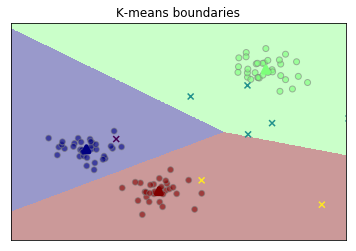

In [10]:
# Todo: Once the above is done, plot the new data on the previous scatter plot to show where it falls on the cluster
colormap='jet'
plotlib.plot_estimator_boundaries(kmeans, X, y, cm=colormap, alpha=0.4, title='K-means boundaries')
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap=colormap, alpha=0.6, edgecolors='grey')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c=[0, 1, 2], marker='^', 
            linewidths=4, cmap=colormap)
plt.scatter(new_data[:,0],
           new_data[:,1], c=kmeans.predict(new_data), marker='x')
plt.show()

You can see that clustering is somewhat similar to classification, in that each item gets a label. However, there is **no ground truth**, and consequently the labels themselves have no meaning besides indicating groupings. Let's go back to the LFW faces dataset where clustering can be performed on the face images. It might be that the cluster 3 found by the algorithm contains only faces of a particular person e.g. Jennifer Lopez. But you can only know that *after* you look at the pictures, though, and the number 3 is arbitrary assigned. The only information the algorithm might give us is that all faces labelled as 3 are similar.

In k-means clustering, running the algorithm again might result in a different clusters (usually when *k* is large), or even different numbering of clusters, because of the random nature of the initialization of cluster centers, also known as "seeds".

**Q**: Try with lesser or more number of clusters (*k*). Observe the effect of k-means clustering with different *k* values.

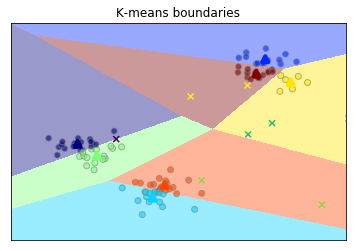

In [11]:
### Todo: Observe the effect of k-means clustering with different k values
# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
#Todo: initialize the kmeans with 3 clusters and fit to dataset
kmeans = KMeans(n_clusters=7)
kmeans = kmeans.fit(X)

colormap='jet'
plotlib.plot_estimator_boundaries(kmeans, X, y, cm=colormap, alpha=0.4, title='K-means boundaries')
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap=colormap, alpha=0.6, edgecolors='grey')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c=[0, 1, 2,3,4,5,6], marker='^', 
            linewidths=4, cmap=colormap)
plt.scatter(new_data[:,0],
           new_data[:,1], c=kmeans.predict(new_data), marker='x')
plt.show()

### Failure cases of k-means

Even if you know the "right" number of clusters for a given dataset, k-means might not always be able to recover them. Each cluster is defined solely by its center, which means that each cluster is a convex shape. As a result of this, k-means can only capture relatively simple shapes. k-means also assumes that all clusters have the same "diameter" in some sense; it always draws the boundary between clusters to be exactly in the middle between the cluster centers. That can sometimes lead to surprising
results.

In [12]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)

Text(0,0.5,'Featured2')

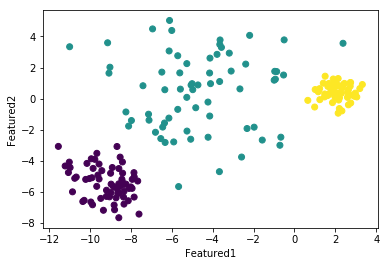

In [13]:
#todo: visualize this varied dataset and see how it is before implementing kmeans
plt.scatter(X_varied[:,0],X_varied[:,1],c=y_varied)
plt.xlabel('Featured1')
plt.ylabel('Featured2')

Text(0,0.5,'Featured2')

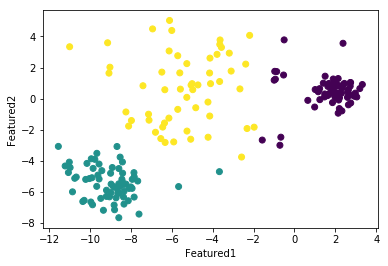

In [14]:
#todo: now, fit the dataset to kmeans and see how it matches the earlier data

kmeans = KMeans(n_clusters=3)
kmeans_pred = kmeans.fit_predict(X_varied)
                
#plot
plt.scatter(X_varied[:,0],X_varied[:,1],c=kmeans_pred)
plt.xlabel('Featured1')
plt.ylabel('Featured2')

One might have expected the dense region in the lower left to be the first cluster, the dense region in the upper right to be the second, and the less dense region in the center to be the third. Instead, both denser clusters have some points that are far
away from all the other points in these clusters that are near their centers. k-means also assumes that all directions are equally important for each cluster. 

Text(0,0.5,'Featured2')

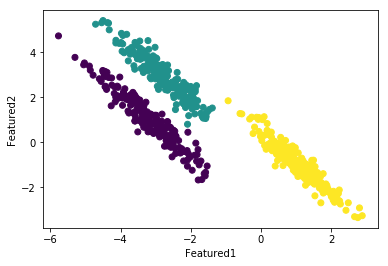

In [15]:
# This is to demonstrate how if we have a stretched data

# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

#Todo: plot the stretched data
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('Featured1')
plt.ylabel('Featured2')

Text(0,0.5,'Featured2')

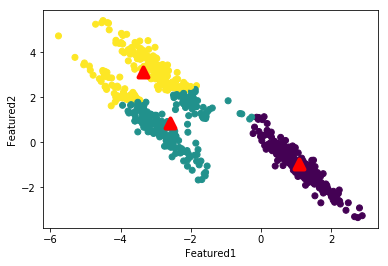

In [16]:
# Todo: fit and predict this stretched data, and then plot it
kmean = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1],marker='^',
           c='red',s=100,linewidth=4,cmap='viridis')
plt.xlabel('Featured1')
plt.ylabel('Featured2')

Here, we have a two-dimensional dataset where there are three clearly separated parts in the data. However, these groups are stretched in a diagonal way. As k-means only considers the distance to the nearest cluster center and that clusters are often circular in shape, it can't handle this kind of data.

k-means also performs poorly if the clusters have more complex shapes, like the `two_moons` data we have encountered before

In [17]:
# Todo: generate synthetic two_moons data (with less noise)
X, y =make_moons(n_samples =200, noise=0.05, random_state=1)

Text(0,0.5,'Featured2')

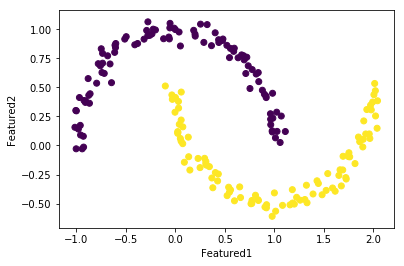

In [18]:
# Todo: Visualize this moons dataset
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('Featured1')
plt.ylabel('Featured2')

Text(0,0.5,'Featured2')

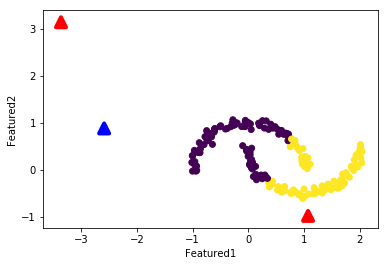

In [19]:
# Todo: fit on kmeans and visualize again
kmean = KMeans(n_clusters=2)
y_pred = kmean.fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1],marker='^',
           c=['red','blue'],s=100,linewidth=4,cmap='viridis')
plt.xlabel('Featured1')
plt.ylabel('Featured2')

### Vector Quantization (*we have not learnt PCA, but I will go through this section briefly)

There are some interesting parallels between k-means and the dimensionality reduction methods we saw earlier such as PCA and NMF. If you recall, PCA tries to find the directions of maximum variance in data, while NMF tries to find additive components which corresponds to the extremes or parts of the data. Basically, they both tried to express data points as a sum over some components, which is lesser than the original dimension of the data. k-means tries to represent each data point using a cluster center; think of how a point being represented by only a single component, which is the cluster. In this sense, k-means is performing some kind of "decomposition", where each point is represented using a single component. This is known as **vector quantization**. At a much larger scale, imagine we have 1,000 3-D data points clustered into 40 clusters. That means we are representing each point with a single value which is taken from the cluster number.

An interesting aspect of vector quantization using k-means is that we can use many more clusters than input dimensions to encode our data. In the `two_moons` data, there is nothing much we can do if we opt for PCA or NMF, as it lives in only two dimensions. Reducing it to one dimension with PCA or NMF would completely destroy the structure of the data. But we can find a more expressive representation with k-means, by intentionally using more cluster centers. 

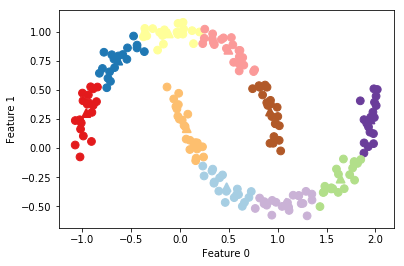

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


In [20]:
#todo: run this block to see the visuals
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60, marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()
print("Cluster memberships:\n{}".format(y_pred))

Here, we used 10 cluster centers, which means each point is now assigned a number between 0 and 9. We can see this as the data being represented using 10 components (that is, we now have 10 new features), with all features being 0, apart from the one that
represents the cluster center the point is assigned to. 

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier #or logistic
# one-hot-encoding: creates a 10-D vector with all features 0, apart from the one that represents the assigned cluster
enc = OneHotEncoder()
enc.fit(y_pred.reshape(-1, 1))
X_enc = enc.transform(y_pred.reshape(-1, 1)).toarray()
print(X_enc)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


Using this 10-dimensional representation, it would now be possible to separate the two half-moon shapes using a linear model, which would not have been possible using the original two features. 

**Q**: Use a linear model to classify the newly encoded data `X_enc` into the two classes. 
Are the two classes well separated? Plot to show.

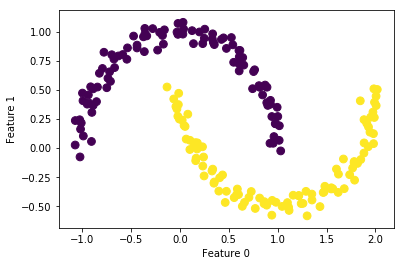

Cluster memberships:
[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


In [22]:
# Todo: use any one of classification algorithm that is proven to be a good linear separator, and fit this enc value
sgd = SGDClassifier()
sgd.fit(X_enc,y)

y_pred_enc =sgd.predict(X_enc)
# Todo: then, proof that by using vector quantization, we can cluster the moons appropriately.
plt.scatter(X[:, 0], X[:, 1], c=y_pred_enc, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()
print("Cluster memberships:\n{}".format(y_pred_enc))

What we have demonstrated here is the ability of clustering to perform vector quantization on the data, to create a better representation that is more suited for classification.

k-means is a very popular algorithm for clustering, not only because it is relatively easy to understand and implement, but also because it runs relatively quickly. k-means scales easily to large datasets, and `scikit-learn` even includes a more scalable
variant in the `MiniBatchKMeans` class, which can handle very large datasets. 

One of the drawbacks of k-means is that it relies on a random initialization, which means the outcome of the algorithm depends on a random seed. By default, `scikit-learn` runs the algorithm 10 times with 10 different random initializations (see parameter `n_init`), and returns the best result. Further downsides of k-means are the relatively restrictive assumptions made on the shape of clusters, and the requirement to specify the number of clusters you are looking for (which might not be known in a real-world application).

Next, we will look at two more clustering algorithms that improve upon these properties in some ways.

## Agglomerative Clustering

**Agglomerative clustering** refers to a collection of clustering algorithms that all build upon the same principles: the algorithm starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied. The stopping criterion implemented in `scikit-learn` is the number of clusters, so similar clusters are merged until only the specified number of clusters are left. There are several linkage criteria that specify how exactly the "most similar cluster" is measured. This measure is always defined between two existing clusters.
The following three choices are implemented in scikit-learn:
* *ward*: The default choice, ward picks the two clusters to merge such that the variance
within all clusters increases the least. This often leads to clusters that are relatively
equally sized.
* *average*: Average linkage merges the two clusters that have the smallest average distance
between all their points.
* *complete*: Complete linkage (also known as maximum linkage) merges the two clusters that
have the smallest maximum distance between their points.

*ward* works on most datasets, and we will use it in our examples. If the clusters have very dissimilar numbers of members (if one is much bigger than all the others, for example), *average* or *complete* might work better. The following are some commonly used cluster distances, and their respective expressions:

![](resources/cluster-distances.png)


The following figure illustrates the progression of agglomerative clustering on a two-dimensional dataset, looking for three clusters:

![](resources/agglomerative-steps.png)

Initially, each point is its own cluster. Then, in each step, the two clusters that are closest are merged. In the first four steps, two single-point clusters are picked and these are joined into two-point clusters. In step 5, one of the two-point clusters is extended to a third point, and so on. In step 9, there are only three clusters remaining. As we specified that we are looking for three clusters, the algorithm then stops. Let's have a look at how agglomerative clustering performs on the simple three cluster data we used here. Because of the way the algorithm works, agglomerative
clustering cannot make predictions for new data points. Therefore, `AgglomerativeClustering` has no `predict` method. To build the model and get the cluster memberships on the training set, use the `fit_predict` method instead.

Text(0,0.5,'Featured2')

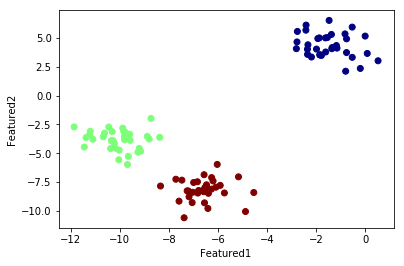

In [23]:
#todo: import AgglomerativeClustering module from sklearn and fit it on a blob as before
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
plt.scatter(X[:,0],X[:,1],c=y, cmap='jet')
plt.xlabel('Featured1')
plt.ylabel('Featured2')

Text(0,0.5,'Featured2')

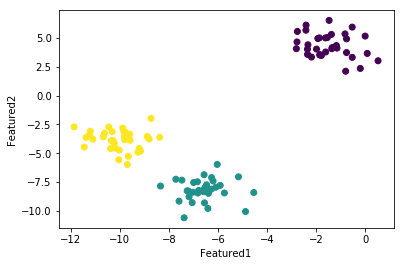

In [24]:
agg = AgglomerativeClustering(n_clusters=3)
y_pred_agg= agg.fit_predict(X)
                
#plot
plt.scatter(X[:,0],X[:,1],c=y_pred_agg)
plt.xlabel('Featured1')
plt.ylabel('Featured2')

As expected, we get the same results here with such a simple dataset. While the `scikit-learn`
implementation of agglomerative clustering requires you to specify the number of
clusters you want the algorithm to find, agglomerative clustering methods provide
some help with choosing the right number, which we will come to next.

### Hierarchical clustering and dendrograms

Agglomerative clustering produces what is known as a *hierarchical clustering*. The clustering proceeds iteratively, and every point makes a journey from being a single point cluster to belonging to some final cluster. Each intermediate step provides a
clustering of the data (with a different number of clusters). The figure below shows an example of some data points which have been clustered in a hierarchical way, providing some insight into how each cluster breaks up into smaller clusters:
<img src="resources/hierarchical-clusters.png" width="400" />

Visualizing this way is somewhat limited to only 2-D data. There is another way to visualize hierarchical clustering, called a *dendrogram*, that can handle multi-dimensional datasets. `scikit-learn` does not have the functionality to draw this, but we can go to the SciPy library to generate it. Clustering algorithms in SciPy are slightly different in terms of usage. SciPy provides a function that takes a data array X and computes a *linkage array*, which encodes hierarchical cluster similarities. We can then feed this linkage array into the SciPy `dendrogram` function to plot the dendrogram.

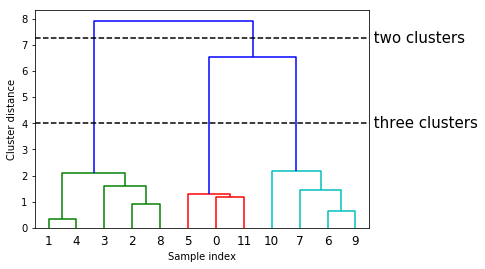

In [25]:
# Todo: Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward
# Todo: Either use the same blob from before or create a new one

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
X,y =make_blobs(random_state=0, n_samples=12)
# Todo: Assign the ward clustering to variable named linkage_array and plot the dendogram
linkage_array =ward(X)
dendrogram(linkage_array)
# Once you have done the above, run this line of code Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

The dendrogram shows data points as points on the bottom (numbered from 0 to 11). Then, a tree is plotted with these points (representing single-point clusters) as the leaves, and a new parent node is added for each two clusters that are joined. At the top level, there are two branches, one consisting of points 5, 0, 11, 10, 7, 6, and 9, and the other consisting of points 1, 4, 3, 2, and 8. These correspond to the two largest clusters.

### Interpreting the dendrogram further

The y-axis in the dendrogram doesn't just specify when in the agglomerative algorithm two clusters get merged. The length of each branch also shows how far apart the merged clusters are. The longest branches in this dendrogram are the three lines that are marked by the dashed line labeled "three clusters." That these are the longest
branches indicates that going from three to two clusters meant merging some very far-apart points. We see this again at the top of the chart, where merging the two remaining clusters into a single cluster again bridges a relatively large distance.

#### Checking the settings

One thing we can do to check if our choice of distance metric is good is to check the Cophenetic Correlation Coefficient of your clustering with help of the `cophenet()` function. This compares the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer the value is to 1, the better the clustering preserves the original distances:

In [26]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(linkage_array, pdist(X))
print(c)

0.8121412861495917


In [27]:
# Now lets try with average, complete and single link hierarchical clusters.
# Todo: import single, average and complete from scipy and get the Cophenetic Correlation Coefficient
from scipy.cluster.hierarchy import single, complete, average
z = single(X)
c, coph_dists = cophenet(z, pdist(X))
print(c)
z = average(X)
c, coph_dists = cophenet(z, pdist(X))
print(c)
z = complete(X)
c, coph_dists = cophenet(z, pdist(X))
print(c)

0.7898426162175275
0.8452151291186623
0.8426771662540814


So, average linkage may be a slightly better option compared the the ward linkage.

#### How to determine the optimal number of clusters in a dataset?

This is always a big challenge with no one-and-only correct method, because clustering in explorative in nature, hence some human intervention is always needed to ascertain if it is giving sufficiently good clusters. Typically, one would just manually specify how many clusters you wish to arrive at (`scikit-learn`'s version of agglomerative clustering allows us to specify); SciPy's `dendrogram` on the other hand, allows us to set a distance threshold to obtain the clusters.

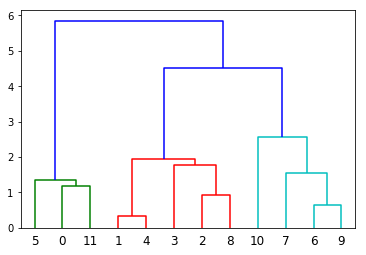

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0], [35.0, 35.0, 45.0, 45.0], [65.0, 65.0, 75.0, 75.0], [55.0, 55.0, 70.0, 70.0], [40.0, 40.0, 62.5, 62.5], [105.0, 105.0, 115.0, 115.0], [95.0, 95.0, 110.0, 110.0], [85.0, 85.0, 102.5, 102.5], [51.25, 51.25, 93.75, 93.75], [12.5, 12.5, 72.5, 72.5]], 'dcoord': [[0.0, 1.1803786988620995, 1.1803786988620995, 0.0], [0.0, 1.347556198005518, 1.347556198005518, 1.1803786988620995], [0.0, 0.3320945047164902, 0.3320945047164902, 0.0], [0.0, 0.9268322277319817, 0.9268322277319817, 0.0], [0.0, 1.7666691791158273, 1.7666691791158273, 0.9268322277319817], [0.3320945047164902, 1.9347848073001699, 1.9347848073001699, 1.7666691791158273], [0.0, 0.6458019336639491, 0.6458019336639491, 0.0], [0.0, 1.535624844209258, 1.535624844209258, 0.6458019336639491], [0.0, 2.5596695995935077, 2.5596695995935077, 1.535624844209258], [1.9347848073001699, 4.507219356703066, 4.507219356703066, 2.5596695995935077], [1.347556198005518, 5.849186875899877, 5.849186

In [28]:
dg = dendrogram(z, color_threshold=3) 
plt.show()
print(dg)
print(z)

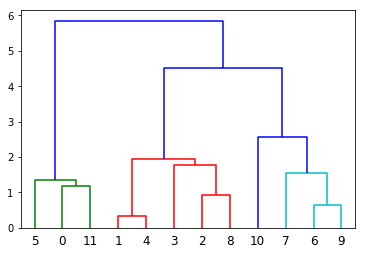

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0], [35.0, 35.0, 45.0, 45.0], [65.0, 65.0, 75.0, 75.0], [55.0, 55.0, 70.0, 70.0], [40.0, 40.0, 62.5, 62.5], [105.0, 105.0, 115.0, 115.0], [95.0, 95.0, 110.0, 110.0], [85.0, 85.0, 102.5, 102.5], [51.25, 51.25, 93.75, 93.75], [12.5, 12.5, 72.5, 72.5]], 'dcoord': [[0.0, 1.1803786988620995, 1.1803786988620995, 0.0], [0.0, 1.347556198005518, 1.347556198005518, 1.1803786988620995], [0.0, 0.3320945047164902, 0.3320945047164902, 0.0], [0.0, 0.9268322277319817, 0.9268322277319817, 0.0], [0.0, 1.7666691791158273, 1.7666691791158273, 0.9268322277319817], [0.3320945047164902, 1.9347848073001699, 1.9347848073001699, 1.7666691791158273], [0.0, 0.6458019336639491, 0.6458019336639491, 0.0], [0.0, 1.535624844209258, 1.535624844209258, 0.6458019336639491], [0.0, 2.5596695995935077, 2.5596695995935077, 1.535624844209258], [1.9347848073001699, 4.507219356703066, 4.507219356703066, 2.5596695995935077], [1.347556198005518, 5.849186875899877, 5.849186

In [29]:
# todo: run with different threshold and see the values
dg = dendrogram(z, color_threshold=2) 
plt.show()
print(dg)
print(z)

The only information that allows us to know which data point belongs to which cluster, is in the `color_list` of the output of `dendrogram`. Information on the distances are in the linkage matrix `Z`.

The **Elbow Method** heuristic is probably the most popular technique of finding the optimal number of clusters due to its simple explanation (amount of variance explained by number of clusters) coupled with a visual check. Basically, it tries to find the clustering step where the acceleration of distance growth is the biggest. 

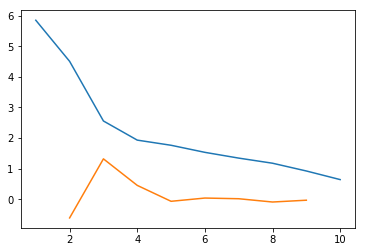

clusters: 3


In [30]:
last = z[-10:, 2]
last_rev = last[::-1]  # reverse the list
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

<img src="resources/hierarchical-clusters.png" width="300" />
3 clusters. Acceptable?

One known issue of this method has to do with the way an "elbow" is defined: you need at least a right and a left point, which implies that this method will never be able to tell you that all your data is in one single cluster only. Also, if your data has many clusters of different variances, then this method might get the optimal number of clusters a little wrong (either 1 more or 1 less usually).

Another method of determining the optimal number of clusters is using an *i8nformation-theoretic* approach by computing a *distortion rate* for many values of *k* (often from 1 to *K*) to plot a distortion curve. "Jumps" in the resulting values then signify reasonable choices for *k*, with the largest jump representing the best choice. Read [here](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#An_Information_Theoretic_Approach.5B6.5D) for more information on this method.

Overall, the hierarchical agglomerative method still fails at separating complex shapes like the `two_moons` dataset.

**Q**: Perform hierarchical agglomerative clustering (using SciPy functions) on the `make_blobs` dataset (which should have 3 clear clusters), show the dendrogram, and attempt to use the Elbow Method to discover the optimal number of clusters.  

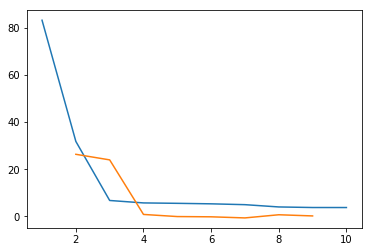

2


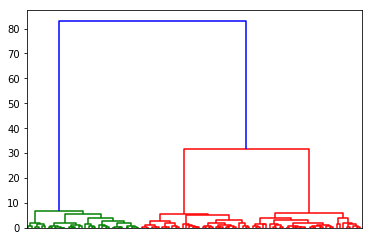

By Default, threshold was set at, 58.20182342534576


In [31]:
X, y = make_blobs(random_state=1)

# Todo: continue coding
def get_k_from_elbow(z):
    last = z[-10:, 2]
    last_rev = last[::-1]  # reverse the list
    idxs = np.arange(1, len(last) + 1)
    plt.plot(idxs, last_rev)

    acceleration = np.diff(last, 2)  # 2nd derivative of the distances
    acceleration_rev = acceleration[::-1]
    plt.plot(idxs[:-2] + 1, acceleration_rev)
    plt.show()
    k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
    return k
    
z = ward(X)
k_opt = get_k_from_elbow(z)
print (k_opt)
dendrogram(z,no_labels=True)
plt.show()
print ('By Default, threshold was set at, {}'.format(0.7*max(z[:,2])))

## DBSCAN

Another very useful clustering algorithm is **DBSCAN** (which stands for "density based
spatial clustering of applications with noise"). The main benefits of DBSCAN are that it does not require the user to set the number of clusters a priori, it can capture clusters of complex shapes, and it can identify points that are not part of any
cluster. DBSCAN is somewhat slower than agglomerative clustering and k-means, but still scales to relatively large datasets.

DBSCAN works by identifying points that are in "crowded" regions of the feature space, where many data points are close together. These regions are referred to as dense regions in feature space. The idea behind DBSCAN is that clusters form dense
regions of data, separated by regions that are relatively empty.

Points that are within a dense region are called core samples (or core points). There are two parameters in DBSCAN: `min_samples` and `eps`. If there are at least `min_samples` number of data points within a distance of `eps` to a given
data point, that data point is classified as a core sample. Core samples that are closer to each other than the distance eps are put into the same cluster by DBSCAN.

### How does this work?

The algorithm works by picking an arbitrary point to start with. It then finds all points with distance `eps` or less from that point. If there are less than `min_samples` points within distance `eps` of the starting point, this point is labeled as "noise", meaning that it doesn't belong to any cluster. If there are more than `min_samples` points within a distance of `eps`, the point is labeled a "core sample" and assigned a new cluster label. Then, all neighbors (within `eps`) of the point are visited. If they have not been assigned a cluster yet, they are assigned the new cluster label that was just created. If
they are core samples, their neighbors are visited in turn, and so on. The cluster
grows until there are no more core samples within distance `eps` of the cluster. Then another point that hasn't yet been visited is picked, and the same procedure is repeated.

Concisely, in DBSCAN, a special label is assigned to each sample (point) using the following criteria:
* A point is considered as *core sample* if at least a specified number (`min_samples`) of neighboring points fall within the specified radius `eps`.
* A *boundary point* is a point that has fewer neighbors than MinPts within `eps`, but lies within the `eps` radius of a core point.
* All other points that are neither core nor border points are considered as *noise* points.

Like agglomerative clustering, DBSCAN does not allow predictions on
new test data, so we will use the `fit_predict` method to perform clustering and
return the cluster labels in one step:

Text(0,0.5,'Featured2')

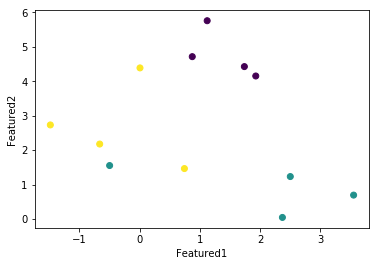

In [32]:
# Todo: import DBSCAN from sklearn.cluster
from sklearn.cluster import DBSCAN 
# Todo: make blobs again
X, y = make_blobs(random_state=0, n_samples=12)

# Todo: Visualize this blob
plt.scatter(X[:,0],X[:,1],c=y, cmap='viridis')
plt.xlabel('Featured1')
plt.ylabel('Featured2')

In [33]:
# Todo:  fit and predict this new dataset
dbscan = DBSCAN()
y_pred_dbscan =dbscan.fit_predict(X)
y_pred_dbscan

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

Opps! As you can see, all data points were assigned the label -1, which stands for noise. This
is a consequence of the default parameter settings for `eps` and `min_samples`, which
are not tuned for small toy datasets. Let's try other combination of settings then...

In [34]:
# Todo: run the fit_predict on dbscan with different min_samples and epsilon values and see how it performs
list_eps =[1,1.5,2,3]
for samples in range (1,6):
    for eps in list_eps:
        dbscan = DBSCAN(min_samples=samples, eps=eps)
        y_pred_dbscan =dbscan.fit_predict(X)
        print('min Samples:{},epsilon:{},cluster  list:{}'
             .format(samples, eps,y_pred_dbscan))
DBSCAN(eps=-11)

min Samples:1,epsilon:1,cluster  list:[0 1 1 2 1 3 4 4 1 4 5 6]
min Samples:1,epsilon:1.5,cluster  list:[0 1 1 1 1 0 2 2 1 2 2 0]
min Samples:1,epsilon:2,cluster  list:[0 1 1 1 1 0 0 0 1 0 0 0]
min Samples:1,epsilon:3,cluster  list:[0 0 0 0 0 0 0 0 0 0 0 0]
min Samples:2,epsilon:1,cluster  list:[-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min Samples:2,epsilon:1.5,cluster  list:[0 1 1 1 1 0 2 2 1 2 2 0]
min Samples:2,epsilon:2,cluster  list:[0 1 1 1 1 0 0 0 1 0 0 0]
min Samples:2,epsilon:3,cluster  list:[0 0 0 0 0 0 0 0 0 0 0 0]
min Samples:3,epsilon:1,cluster  list:[-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min Samples:3,epsilon:1.5,cluster  list:[0 1 1 1 1 0 2 2 1 2 2 0]
min Samples:3,epsilon:2,cluster  list:[0 1 1 1 1 0 0 0 1 0 0 0]
min Samples:3,epsilon:3,cluster  list:[0 0 0 0 0 0 0 0 0 0 0 0]
min Samples:4,epsilon:1,cluster  list:[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min Samples:4,epsilon:1.5,cluster  list:[-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min Samples:4,epsilon:2,cluster  list:[1 0 0 0 0

DBSCAN(algorithm='auto', eps=-11, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

Let's take a closer look at some of these settings, particularly those that have clear cut clusters (cluster numbers 0, 1, 2), and those with some noise points.

`DBSCAN` comes with some nice properties. `core_sample_indices_` gets us the indices of the core samples, whereas noise samples can be found by the label -1, what remains are the boundary samples. Let's create a plot.

In [35]:
ms = 3
ep = 1.5
dbscan = DBSCAN(min_samples=ms, eps=ep)
clusters = dbscan.fit_predict(X)
all_samples = np.arange(0,len(X))
core_samples = dbscan.core_sample_indices_
noise = np.where(clusters == -1)[0]
print("All samples: ",all_samples)
print("Core samples: ", core_samples)
print("Noise: ", noise)
boundary_samples = np.setdiff1d(np.setdiff1d(all_samples, core_samples), noise)
print("Boundary samples: ", boundary_samples)

All samples:  [ 0  1  2  3  4  5  6  7  8  9 10 11]
Core samples:  [ 0  1  3  4  5  6  8  9 11]
Noise:  []
Boundary samples:  [ 2  7 10]


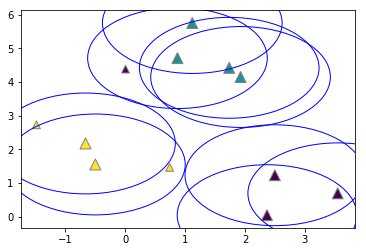

In [36]:
# Todo: plot all three types of points
fig, ax =plt.subplots()
plt.scatter(X[boundary_samples,0],X[boundary_samples,1],
            c= clusters[boundary_samples],cmap='viridis',
            edgecolors ='grey',marker='^',s=60)
plt.scatter(X[core_samples,0],X[core_samples,1],
            c= clusters[core_samples],cmap='viridis',
            edgecolors ='grey',marker='^',s=120)
plt.scatter(X[noise,0],X[noise,1],
            c= 'white',cmap='viridis',
            edgecolors ='black',marker='o',s=40)

for i in core_samples:
    circle = plt.Circle((X[i,0],X[i,1]),ep,color='blue',Fill=False)
    ax.add_artist(circle)
plt.show()

**Q**: Can you make sense of what `min_samples` and `eps` settings control in terms of clustering ?
<br>
**if you are unsure, go to the** [Naftali Harris](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/) **site to explore more**

**Tip**: While DBSCAN doesn’t require setting the number of clusters explicitly, setting `eps` implicitly controls how many clusters will be found. Finding a good setting for `eps` is sometimes easier after scaling the data using `StandardScaler` or `MinMaxScaler`, as using these scaling techniques will ensure that all features have similar ranges.

Text(0,0.5,'Featured2')

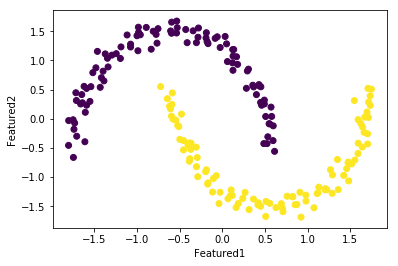

In [37]:
# Lets try on the moons data again
#Todo: import StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler 
# Todo: make blobs again
X, y = make_moons(random_state=0, n_samples=200,noise=0.05)
# Todo: Make moons

# Todo: rescale the data to zero mean and unit variance. Assign scaler to standard scaler 
# Todo: fit and transform it to the moons data
scaler =StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Todo: fit and predict using dbscan
dbscan = DBSCAN()
y_pred_dbscan = dbscan.fit_predict(X_scaled)
# Todo: plot the cluster assignments
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=y_pred_dbscan, cmap='viridis')
plt.xlabel('Featured1')
plt.ylabel('Featured2')

Perfect!

One of the main advantages of using DBSCAN is that it does not assume that the clusters have a spherical shape as in k-means. Furthermore, DBSCAN is different from k-means and hierarchical clustering in that it doesn't necessarily assign each point to a cluster but is capable of removing noise points if they fall too far from significant clusters.

## Comparing and Evaluating Clustering Algorithms

One of the challenges in applying clustering algorithms is that it is very hard to assess how well an algorithm worked, and to compare outcomes between different algorithms. After talking about the algorithms behind k-means, agglomerative clustering,
and DBSCAN, we will now compare them on some real-world datasets.

There are metrics that can be used to assess the outcome of a clustering algorithm relative to a ground truth clustering, the most important ones being the *adjusted rand index* (ARI) and *normalized mutual information* (NMI), which both provide a quantitative measure between 0 and 1.

We shall now compare the k-means, agglomerative clustering, and DBSCAN algorithms using ARI. Random assignment of points to two clusters is also shown for comparison. For more information about ARI, read up the `scikit-learn` documentation [here](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html).

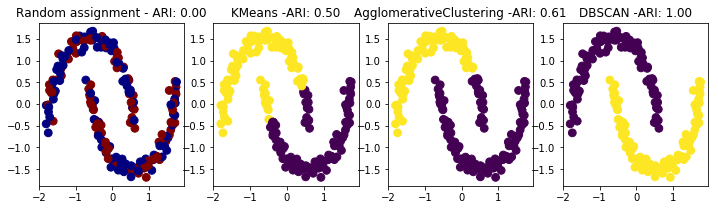

In [38]:
#Here we are going to compare the score on Random assignment, kmeans, dbscan and agglomerative clustering

# Todo: import adjusted_rand_score from sklearn
from sklearn.metrics import adjusted_rand_score
# Todo: make moons dataset (with similar parameters as before)
X, y = make_moons(random_state=0, n_samples=200,noise=0.05)
# Todo: rescale the data to zero mean and unit variance. Tip: refer the step before
scaler.fit(X)
X_scaled = scaler.transform(X)

# Todo: set different subplots to fig and axes below
fig, axes =  plt.subplots(1,4, figsize =(12,3))
subplot_kw={'xticks':{},'yticks':{}}
# Todo: make a list of algorithms to use, and assign it to algorithms
algorithm = [KMeans(n_clusters=2),AgglomerativeClustering(n_clusters=2),
             DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap='jet', s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
adjusted_rand_score(y, random_clusters)))

# Todo: plot the other 3 algorithms
for ax, algorithm in zip(axes[1:],algorithm):
    clusters =algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters, cmap='viridis',s=60)
    ax.set_title("{} -ARI: {:.2f}".format(algorithm.__class__.__name__,
                                     adjusted_rand_score(y,clusters)))
plt.show()

Note that you might be tempted to think why *accuracy score* cannot be used in this case. The difference between accuracy score and ARI is that in clustering, we are not concerned about the accuracy of getting which data samples are "classified" into which clusters. This concept is incorrect. In clustering, we are only concern about membership: which data samples are grouped into which clusters regardless of order. The group composition play a more important role than the samples themselves. See the following experiment:

In [39]:
from sklearn.metrics import accuracy_score

# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

# accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))

# adjusted rand score is 1, as the clustering is exactly the same
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


## This part of the code is for you to check back at home as we did not go through the LFW dataset yet

Let’s go back to the example of face images. We hope to find groups of similar faces—say, men and women, or old
people and young people, or people with beards and without. Let’s say we cluster the
data into two clusters, and all algorithms agree about which points should be clustered
together. We still don’t know if the clusters that are found correspond in any
way to the concepts we are interested in. The only way to
know whether the clustering corresponds to anything we are interested in is to analyze
the clusters manually.

In [ ]:
# extract eigenfaces from lfw data and transform data
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

# extract eigenfaces from lfw data and transform data
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7, download_if_missing=False)
image_shape = people.images[0].shape
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask] / 255
y_people = people.target[mask]

pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

# apply DBSCAN with default parameters
dbscan = DBSCAN(min_samples = 3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Even with a large eps of 15, we get only a single cluster and noise points. With this, find out what these "noise" looks like compared to the rest of the data. To understand better, let's see how many of these points are noise and how many are inside the cluster:

In [ ]:
# Count number of points in all clusters and noise.
# bincount doesn't allow negative numbers, so we need to add 1.
# The first number in the result corresponds to noise points.
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

There are very few noise points — only 32 — so we can look at all of them:

In [ ]:
noise = X_people[labels==-1]
fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1, cmap='gray')
plt.show()

We can guess why they were labeled as noise samples. Many of these images have faces with their hats visible, images with odd angles or crops that are too close. Some of these images also have extreme directional lighting on one side of their faces. Two of these faces have their mouth areas obscured by a hand and a glass.

This kind of analysis — trying to find “the odd one out” — is called **outlier detection**. DBSCAN has this advantage of being able to detect outliers from the noise samples it labels. If
this was a real application, we might try to do a better job of cropping images, to get
more homogeneous data. There is little we can do about people in photos sometimes
wearing hats, drinking, or holding something in front of their faces, but it’s good to
know that these are issues in the data that any algorithm we might apply needs to
handle.

**Q**: Try performing agglomerative clustering on this dataset, use *k*=40. Plot the dendrogram and visualize some of the clusters that are interesting. Note that agglomerative clustering (unlike k-means) do not have cluster centers, so you may want to visualize the clusters by just picking on some data point members of each cluster, if the cluster is too large.

## Summary

This section has shown that applying and evaluating clustering is a highly qualitative
procedure, and often most helpful in the exploratory phase of data analysis. We
looked at three clustering algorithms: **k-means, DBSCAN,** and **agglomerative clustering**.
All three have a way of controlling the granularity of clustering. k-means and
agglomerative clustering allow you to specify the number of desired clusters, while
DBSCAN lets you define proximity using the eps parameter, which indirectly influences
cluster size. All three methods can be used on large, real-world datasets, are relatively
easy to understand, and allow for clustering into many clusters.

Strengths of each of these algorithms:
* **k-means**: allows characterization of clusters using cluster means (top-down). It can also be viewed as a decomposition method by way of vector quantization.
* **agglomerative**: provides whole hierarchy of possible partitions of the data (bottom-up), which can be inspected via dendrograms
* **DBSCAN**: allows for detection of outlier points that are not part of any cluster, and it can help determine automatically the number of clusters. It also allows for more complex shapes (just like the `two_moons` data) to be clustered correctly.